(2051, 278) (2051,)
(439, 278) (439,)
(440, 278) (440,)
Test Mean Squared Error: 781069569.2662331
Test R² Score: 0.8859381090931626
Evaluation Mean Squared Error: 2119591383.082308
Evaluation R² Score: 0.7059488931289754


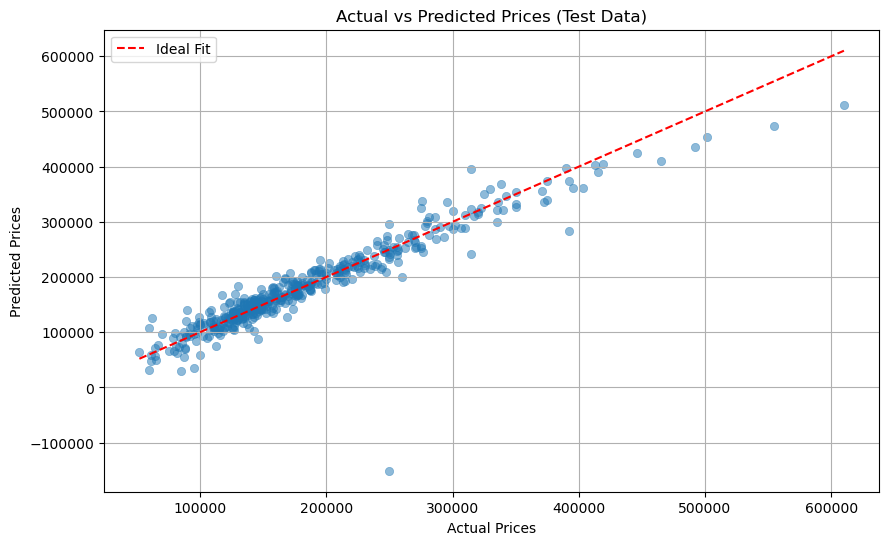

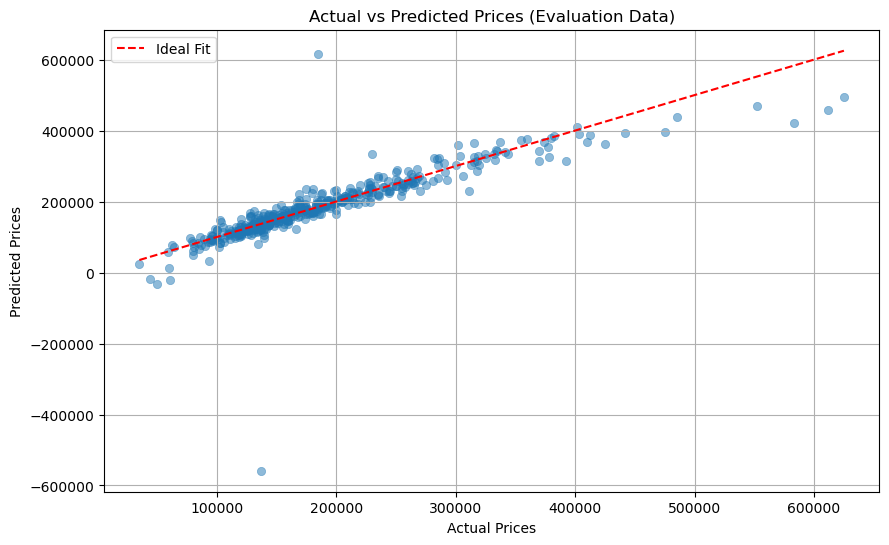

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Last inn datasettet
housing = pd.read_csv('AmesHousing.csv')

# Identifiser kategoriske kolonner
categorical_cols = housing.select_dtypes(include=['object']).columns

# Fyll manglende verdier med 'Unknown' for kategoriske kolonner
housing[categorical_cols] = housing[categorical_cols].fillna('Unknown')

# One-hot encode kategoriske kolonner
housing_encoded = pd.get_dummies(housing, columns=categorical_cols, drop_first=True)

# Velg målvariabel og funksjoner
Xx = housing_encoded.drop(columns=['SalePrice'])
yy = housing_encoded['SalePrice']

# Del datasettet i 70% treningssett og 30% midlertidig sett
Xx_train, Xx_temp, yy_train, yy_temp = train_test_split(Xx, yy, test_size=0.30, random_state=42)

# Del midlertidig sett i 50% testsett og 50% evalueringssett (15% av total data hver)
Xx_test, Xx_eval, yy_test, yy_eval = train_test_split(Xx_temp, yy_temp, test_size=0.50, random_state=42)

# Fyll manglende verdier i numeriske kolonner med 0
Xx_train = Xx_train.fillna(0)
Xx_test = Xx_test.fillna(0)
Xx_eval = Xx_eval.fillna(0)

# Kontroller dimensjoner for å sikre at alt stemmer
print(Xx_train.shape, yy_train.shape)
print(Xx_test.shape, yy_test.shape)
print(Xx_eval.shape, yy_eval.shape)

# Tren modellen på treningsdata
model = LinearRegression()
model.fit(Xx_train, yy_train)

# Gjør prediksjoner på testdata
yy_test_pred = model.predict(Xx_test)

# Gjør prediksjoner på evalueringsdata
yy_eval_pred = model.predict(Xx_eval)

# Beregn MSE og R²-score for testdata
mse_test = mean_squared_error(yy_test, yy_test_pred)
r2_test = r2_score(yy_test, yy_test_pred)
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R² Score: {r2_test}")

# Beregn MSE og R²-score for evalueringsdata
mse_eval = mean_squared_error(yy_eval, yy_eval_pred)
r2_eval = r2_score(yy_eval, yy_eval_pred)
print(f"Evaluation Mean Squared Error: {mse_eval}")
print(f"Evaluation R² Score: {r2_eval}")

# Funksjon for å plotte resultater
def plot_regression_results(y_test, y_pred, title):
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })
    results_df = results_df.sort_values(by='Actual')

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5, edgecolor=None)
    plt.plot(results_df['Actual'], results_df['Actual'], color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot testresultater
plot_regression_results(yy_test, yy_test_pred, 'Actual vs Predicted Prices (Test Data)')

# Plot evalueringsresultater
plot_regression_results(yy_eval, yy_eval_pred, 'Actual vs Predicted Prices (Evaluation Data)')
